<a href="https://colab.research.google.com/github/kaushik3012/3d-pose-warping/blob/master/Task1/Sol_of_3D_pose_warping_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset exploration


*   Explore the **In-shop Clothes Retrieval Benchmark** of the **DeepFashion** dataset
http://mmlab.ie.cuhk.edu.hk/projects/DeepFashion/InShopRetrieval.html
*   Import the dataset in `Google Colab` instead of downloading the whole dataset locally
*   Visualize some samples from the dataset
*   Look for variations and correlations in the dataset
*   Use the `matplotlib` and `seaborn` library to visualize data



###Importing DataSet from  Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Do Not Run this cell if already extracted!
!unzip /content/drive/MyDrive/Colab-Notebooks/img.zip -d /content/drive/MyDrive/Colab-Notebooks/deep-fashion-data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

batch_size = 512

In [ ]:
men_data = image_dataset_from_directory(
    '/content/drive/MyDrive/Colab-Notebooks/deep-fashion-data/img/MEN',
    labels="inferred",
    batch_size=batch_size
  )

Found 7838 files belonging to 9 classes.


In [ ]:
women_data = image_dataset_from_directory(
    '/content/drive/MyDrive/Colab-Notebooks/deep-fashion-data/img/WOMEN',
    labels="inferred",
    batch_size=batch_size
  )

Found 44874 files belonging to 14 classes.


Classes in the Dataset

In [ ]:
men_class_names = men_data.class_names
print(men_class_names)

['Denim', 'Jackets_Vests', 'Pants', 'Shirts_Polos', 'Shorts', 'Suiting', 'Sweaters', 'Sweatshirts_Hoodies', 'Tees_Tanks']


In [ ]:
women_class_names = women_data.class_names
print(women_class_names)

['Blouses_Shirts', 'Cardigans', 'Denim', 'Dresses', 'Graphic_Tees', 'Jackets_Coats', 'Leggings', 'Pants', 'Rompers_Jumpsuits', 'Shorts', 'Skirts', 'Sweaters', 'Sweatshirts_Hoodies', 'Tees_Tanks']


###Visualizing Image Datasets

####Visualizing Men's Cloth Dataset

In [ ]:
for images, labels in men_data.take(1):  # only take 1 batch of dataset
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

mean1 = np.mean(numpy_images, axis=1)
mean2 = np.mean(mean1, axis=1)
class_names_arr=[]
for i in range(np.size(numpy_labels)):
  class_names_arr.append(men_class_names[numpy_labels[i]]);


print("First Five Entries in the DataFrame: ")
df = pd.DataFrame(mean2)
df['Class'] = class_names_arr
df.columns=['Red','Green','Blue','Class']
display(df.head())

print("\n\nDisplay Overall Statistics: ")
display(df.describe())


groupdf = df.groupby('Class')
print("\n\nFirst Entry in Each Class: ")
display(groupdf.first())

print("\n\nDisplay Statistics of Each Class: ")
display(groupdf.agg(['mean','var','std']))

print("\n\nDisplay Classwise Covariance: ")
display(groupdf.cov())
print("\n\nDisplay Classwise Correlation: ")
display(groupdf.corr())

First Five Entries in the DataFrame: 


,Red,Green,Blue,Class
0,201.139572,198.638351,198.813065,Shorts
1,140.836029,171.963608,183.245346,Tees_Tanks
2,203.205063,204.216476,206.343292,Pants
3,203.840240,202.025894,202.934433,Shirts_Polos
4,211.765533,209.463089,209.791565,Sweatshirts_Hoodies




Display Overall Statistics: 


,Red,Green,Blue
count,512.000000,512.000000,512.000000
mean,203.842896,200.428940,199.718460
std,22.603100,22.465183,22.597900
min,115.307434,114.189346,113.751007
25%,192.706100,189.194611,188.792175
50%,209.416901,205.437233,204.945885
75%,219.036049,215.446747,215.043064
max,242.568832,243.095398,242.784866




First Entry in Each Class: 


,Red,Green,Blue
Class,,,
Denim,206.144440,205.268890,202.988876
Jackets_Vests,205.226196,202.605438,198.040222
Pants,203.205063,204.216476,206.343292
Shirts_Polos,203.840240,202.025894,202.934433
Shorts,201.139572,198.638351,198.813065
Suiting,128.169037,125.533218,123.692764
Sweaters,227.363586,226.896255,227.685638
Sweatshirts_Hoodies,211.765533,209.463089,209.791565
Tees_Tanks,140.836029,171.963608,183.245346




Display Statistics of Each Class: 


Red                               Green  \
                           mean          var        std        mean   
Class                                                                 
Denim                199.717590   589.564453  24.280949  199.820557   
Jackets_Vests        191.932098   703.989929  26.532808  188.293655   
Pants                208.808029   249.846436  15.806532  206.625427   
Shirts_Polos         205.480316   613.541504  24.769770  201.700027   
Shorts               210.761841   258.036774  16.063523  206.697769   
Suiting              165.048660  2171.845215  46.603061  162.506210   
Sweaters             212.049820   309.655121  17.597020  207.750336   
Sweatshirts_Hoodies  202.455322   521.620911  22.839021  199.255386   
Tees_Tanks           201.879715   503.859375  22.446812  198.043457   

                                                   Blue               \
                             var        std        mean          var   
Class                                                                  
Denim                 603.800049  24.572343  200.482269   610.679077   
Jackets_Vests         667.975159  25.845215  187.653305   593.841675   
Pants                 200.432373  14.157414  206.369888   183.770065   
Shirts_Polos          680.677734  26.089802  201.609177   678.176270   
Shorts                285.271698  16.889988  204.981094   281.296692   
Suiting              2096.982910  45.792825  160.900574  1980.781494   
Sweaters              321.289825  17.924559  208.555939   274.276489   
Sweatshirts_Hoodies   495.989929  22.270831  198.205322   526.414917   
Tees_Tanks            488.059570  22.092071  196.900650   516.026245   

                                
                           std  
Class                           
Denim                24.711921  
Jackets_Vests        24.368866  
Pants                13.556182  
Shirts_Polos         26.041817  
Shorts               16.771902  
Suiting              44.505972  
Sweaters             16.561295  
Sweatshirts_Hoodies  22.943734  
Tees_Tanks           22.716211



Display Classwise Covariance: 


Red        Green         Blue
Class                                                           
Denim               Red     589.564473   595.041027   588.153276
                    Green   595.041027   603.800061   601.638287
                    Blue    588.153276   601.638287   610.679052
Jackets_Vests       Red     703.989924   667.241287   591.156577
                    Green   667.241287   667.975150   607.678492
                    Blue    591.156577   607.678492   593.841651
Pants               Red     249.846438   214.322550   187.220244
                    Green   214.322550   200.432370   182.310248
                    Blue    187.220244   182.310248   183.770063
Shirts_Polos        Red     613.541484   621.541682   615.167388
                    Green   621.541682   680.677759   674.360404
                    Blue    615.167388   674.360404   678.176257
Shorts              Red     258.036761   253.717647   236.819494
                    Green   253.717647   285.271703   276.027627
                    Blue    236.819494   276.027627   281.296700
Suiting             Red    2171.845319  2127.897539  2031.398029
                    Green  2127.897539  2096.982867  2021.209258
                    Blue   2031.398029  2021.209258  1980.781549
Sweaters            Red     309.655106   260.270639   230.447328
                    Green   260.270639   321.289812   291.441757
                    Blue    230.447328   291.441757   274.276485
Sweatshirts_Hoodies Red     521.620889   473.037137   445.385552
                    Green   473.037137   495.989914   484.681148
                    Blue    445.385552   484.681148   526.414938
Tees_Tanks          Red     503.859365   466.144174   461.664833
                    Green   466.144174   488.059582   491.716991
                    Blue    461.664833   491.716991   516.026259



Display Classwise Correlation: 


Red     Green      Blue
Class                                                  
Denim               Red    1.000000  0.997320  0.980208
                    Green  0.997320  1.000000  0.990792
                    Blue   0.980208  0.990792  1.000000
Jackets_Vests       Red    1.000000  0.973015  0.914290
                    Green  0.973015  1.000000  0.964847
                    Blue   0.914290  0.964847  1.000000
Pants               Red    1.000000  0.957739  0.873733
                    Green  0.957739  1.000000  0.949926
                    Blue   0.873733  0.949926  1.000000
Shirts_Polos        Red    1.000000  0.961784  0.953674
                    Green  0.961784  1.000000  0.992545
                    Blue   0.953674  0.992545  1.000000
Shorts              Red    1.000000  0.935148  0.879011
                    Green  0.935148  1.000000  0.974408
                    Blue   0.879011  0.974408  1.000000
Suiting             Red    1.000000  0.997100  0.979405
                    Green  0.997100  1.000000  0.991735
                    Blue   0.979405  0.991735  1.000000
Sweaters            Red    1.000000  0.825159  0.790748
                    Green  0.825159  1.000000  0.981768
                    Blue   0.790748  0.981768  1.000000
Sweatshirts_Hoodies Red    1.000000  0.929997  0.849952
                    Green  0.929997  1.000000  0.948540
                    Blue   0.849952  0.948540  1.000000
Tees_Tanks          Red    1.000000  0.940003  0.905391
                    Green  0.940003  1.000000  0.979812
                    Blue   0.905391  0.979812  1.000000

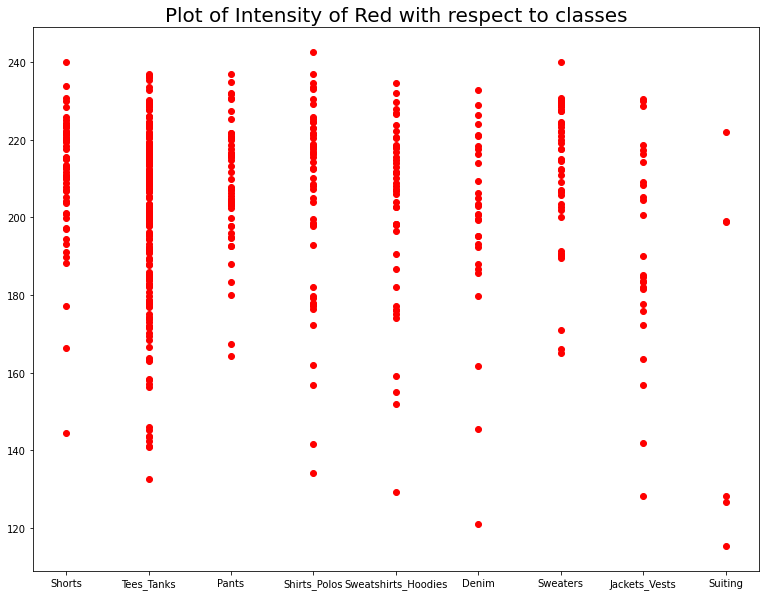

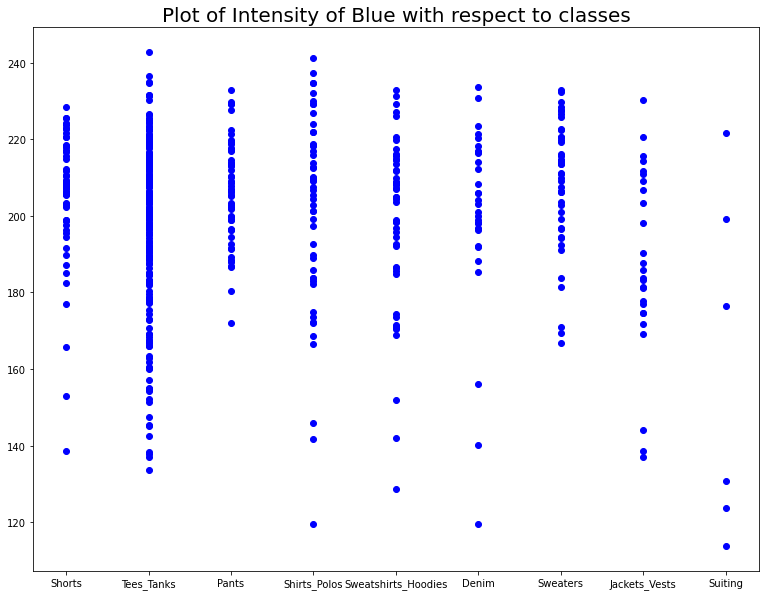

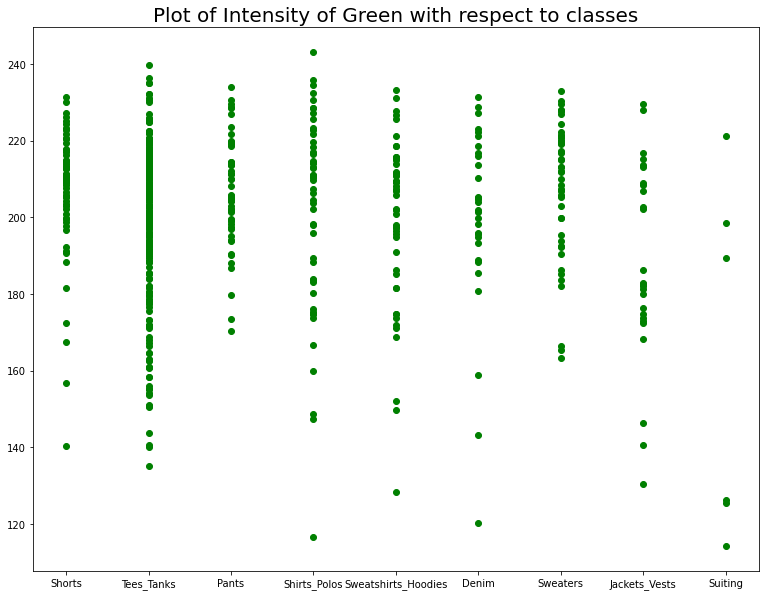

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.scatter(y=df['Red'],x=df['Class'], c='r')
plt.title("Plot of Intensity of Red with respect to classes", fontsize=20)
plt.show()

plt.figure(figsize=(13,10))
plt.scatter(y=df['Blue'],x=df['Class'], c='b')
plt.title("Plot of Intensity of Blue with respect to classes", fontsize=20)
plt.show()

plt.figure(figsize=(13,10))
plt.scatter(y=df['Green'],x=df['Class'], c='g')
plt.title("Plot of Intensity of Green with respect to classes", fontsize=20)
plt.show()

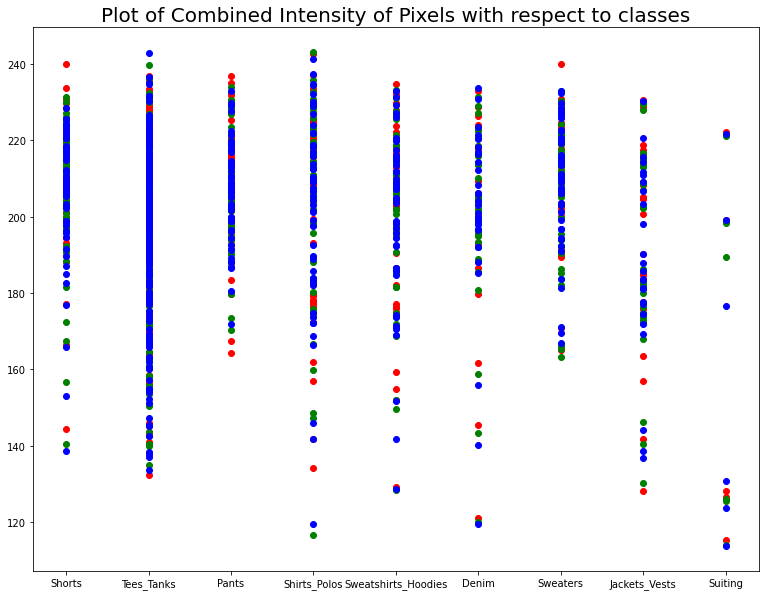

In [ ]:
plt.figure(figsize=(13,10))
plt.scatter(y=df['Red'],x=df['Class'], c='r')
plt.scatter(y=df['Green'],x=df['Class'], c='g')
plt.scatter(y=df['Blue'],x=df['Class'], c='b')
plt.title("Plot of Combined Intensity of Pixels with respect to classes", fontsize=20)
plt.show()

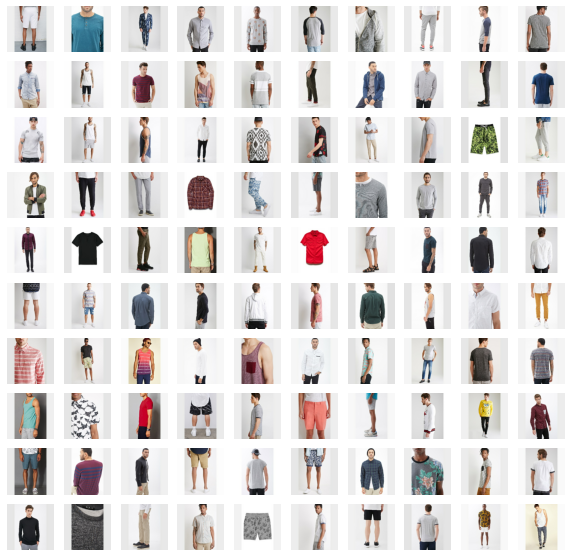

In [ ]:
#Displaying Images in the BatchDataset
plt.figure(figsize=(10, 10))
for i in range(100):
  ax = plt.subplot(10, 10, i + 1)
  plt.imshow(numpy_images[i].astype("uint8"))
  # plt.title(men_data.class_names[labels[i]])
  plt.axis("off")

plt.show()

####Visualizing Women's Cloth Dataset

In [ ]:
for images, labels in women_data.take(1):  # only take 1 batch of dataset
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

mean1 = np.mean(numpy_images, axis=1)
mean2 = np.mean(mean1, axis=1)
class_names_arr=[]
for i in range(np.size(numpy_labels)):
  class_names_arr.append(women_class_names[numpy_labels[i]]);


print("First Five Entries in the DataFrame: ")
df = pd.DataFrame(mean2)
df['Class'] = class_names_arr
df.columns=['Red','Green','Blue','Class']
display(df.head())

print("\n\nDisplay Overall Statistics: ")
display(df.describe())


groupdf = df.groupby('Class')
print("\n\nFirst Entry in Each Class: ")
display(groupdf.first())

print("\n\nDisplay Statistics of Each Class: ")
display(groupdf.agg(['mean','var','std']))

print("\n\nDisplay Classwise Covariance: ")
display(groupdf.cov())
print("\n\nDisplay Classwise Correlation: ")
display(groupdf.corr())

First Five Entries in the DataFrame: 


,Red,Green,Blue,Class
0,201.398926,201.342987,197.171692,Cardigans
1,209.132629,209.269318,209.778198,Tees_Tanks
2,207.481476,203.378983,199.660919,Tees_Tanks
3,214.624374,220.401520,220.221085,Tees_Tanks
4,208.664291,207.045151,206.414886,Sweatshirts_Hoodies




Display Overall Statistics: 


,Red,Green,Blue
count,512.000000,512.000000,512.000000
mean,212.973160,208.063232,205.409698
std,16.568180,16.923313,17.251175
min,111.208252,115.546295,116.313782
25%,204.771603,199.148533,195.631432
50%,214.555824,209.759659,207.658623
75%,224.358971,219.329617,217.431080
max,245.700348,241.551636,238.297501




First Entry in Each Class: 


,Red,Green,Blue
Class,,,
Blouses_Shirts,203.711517,197.495514,194.389679
Cardigans,201.398926,201.342987,197.171692
Denim,167.549332,165.136139,159.393982
Dresses,196.962158,205.597534,206.813660
Graphic_Tees,235.587830,231.985168,228.965195
Jackets_Coats,213.367142,211.987930,210.387497
Leggings,185.423889,185.690323,187.455795
Pants,211.641052,210.633362,208.745743
Rompers_Jumpsuits,196.173538,186.152847,175.387634




Display Statistics of Each Class: 


Red                              Green  \
                           mean         var        std        mean   
Class                                                                
Blouses_Shirts       213.160110  204.838104  14.312166  208.662140   
Cardigans            208.341965  329.734650  18.158597  203.882751   
Denim                208.014404  414.500977  20.359297  209.149658   
Dresses              214.564011  281.884216  16.789407  209.495743   
Graphic_Tees         217.276077  175.572021  13.250359  214.821609   
Jackets_Coats        206.357193  596.400757  24.421318  203.963776   
Leggings             202.378479  152.904160  12.365442  202.320938   
Pants                210.284836  206.691727  14.376777  205.567902   
Rompers_Jumpsuits    212.500885  253.768906  15.930126  206.761429   
Shorts               212.916428  355.688568  18.859707  205.176544   
Skirts               210.905457  345.941650  18.599507  204.340561   
Sweaters             213.502563  289.663300  17.019497  210.446701   
Sweatshirts_Hoodies  216.111374  177.687561  13.329950  207.400772   
Tees_Tanks           214.399918  249.193619  15.785867  208.986725   

                                                  Blue                         
                            var        std        mean         var        std  
Class                                                                          
Blouses_Shirts       210.747162  14.517133  205.602341  215.947601  14.695155  
Cardigans            330.661896  18.184111  200.527695  327.116943  18.086374  
Denim                509.721436  22.577011  210.056152  711.651306  26.676793  
Dresses              305.036896  17.465306  207.530869  330.316467  18.174611  
Graphic_Tees         154.230240  12.418947  213.576569  142.981125  11.957471  
Jackets_Coats        563.082703  23.729364  202.225082  520.044189  22.804477  
Leggings             160.949646  12.686593  202.941223  168.255096  12.971318  
Pants                259.995850  16.124387  204.317245  270.602112  16.449988  
Rompers_Jumpsuits    269.369720  16.412487  204.998230  323.360443  17.982225  
Shorts               357.623444  18.910934  200.787338  375.313385  19.373007  
Skirts               528.920654  22.998276  200.937027  569.603333  23.866364  
Sweaters             259.800812  16.118338  208.771637  248.232986  15.755411  
Sweatshirts_Hoodies  665.605286  25.799327  207.327209  593.408875  24.359986  
Tees_Tanks           233.923767  15.294567  205.658203  239.562103  15.477794



Display Classwise Covariance: 


Red       Green        Blue
Class                                                        
Blouses_Shirts      Red    204.838109  201.970277  193.515803
                    Green  201.970277  210.747160  208.669458
                    Blue   193.515803  208.669458  215.947595
Cardigans           Red    329.734654  318.012099  294.537367
                    Green  318.012099  330.661895  319.916807
                    Blue   294.537367  319.916807  327.116929
Denim               Red    414.500985  455.277363  528.264175
                    Green  455.277363  509.721421  599.305986
                    Blue   528.264175  599.305986  711.651299
Dresses             Red    281.884201  266.986450  261.235823
                    Green  266.986450  305.036897  310.255474
                    Blue   261.235823  310.255474  330.316474
Graphic_Tees        Red    175.572018  160.749866  145.728389
                    Green  160.749866  154.230234  144.996427
                    Blue   145.728389  144.996427  142.981118
Jackets_Coats       Red    596.400784  573.166159  532.437125
                    Green  573.166159  563.082731  534.322482
                    Blue   532.437125  534.322482  520.044174
Leggings            Red    152.904159  155.976781  155.164342
                    Green  155.976781  160.949651  162.715995
                    Blue   155.164342  162.715995  168.255102
Pants               Red    206.691731  205.174047  201.050574
                    Green  205.174047  259.995850  262.170124
                    Blue   201.050574  262.170124  270.602116
Rompers_Jumpsuits   Red    253.768899  225.062137  217.253458
                    Green  225.062137  269.369732  287.464575
                    Blue   217.253458  287.464575  323.360429
Shorts              Red    355.688566  330.815915  334.269691
                    Green  330.815915  357.623437  362.864180
                    Blue   334.269691  362.864180  375.313386
Skirts              Red    345.941652  416.587586  428.365373
                    Green  416.587586  528.920676  541.157600
                    Blue   428.365373  541.157600  569.603311
Sweaters            Red    289.663286  263.978530  246.713522
                    Green  263.978530  259.800820  248.701117
                    Blue   246.713522  248.701117  248.232986
Sweatshirts_Hoodies Red    177.687568  322.237329  302.196201
                    Green  322.237329  665.605278  627.112174
                    Blue   302.196201  627.112174  593.408905
Tees_Tanks          Red    249.193612  224.237458  214.872704
                    Green  224.237458  233.923773  232.260957
                    Blue   214.872704  232.260957  239.562100



Display Classwise Correlation: 


Red     Green      Blue
Class                                                  
Blouses_Shirts      Red    1.000000  0.972078  0.920104
                    Green  0.972078  1.000000  0.978146
                    Blue   0.920104  0.978146  1.000000
Cardigans           Red    1.000000  0.963095  0.896823
                    Green  0.963095  1.000000  0.972733
                    Blue   0.896823  0.972733  1.000000
Denim               Red    1.000000  0.990483  0.972646
                    Green  0.990483  1.000000  0.995058
                    Blue   0.972646  0.995058  1.000000
Dresses             Red    1.000000  0.910495  0.856115
                    Green  0.910495  1.000000  0.977413
                    Blue   0.856115  0.977413  1.000000
Graphic_Tees        Red    1.000000  0.976873  0.919766
                    Green  0.976873  1.000000  0.976412
                    Blue   0.919766  0.976412  1.000000
Jackets_Coats       Red    1.000000  0.989066  0.956047
                    Green  0.989066  1.000000  0.987409
                    Blue   0.956047  0.987409  1.000000
Leggings            Red    1.000000  0.994272  0.967382
                    Green  0.994272  1.000000  0.988783
                    Blue   0.967382  0.988783  1.000000
Pants               Red    1.000000  0.885070  0.850116
                    Green  0.885070  1.000000  0.988404
                    Blue   0.850116  0.988404  1.000000
Rompers_Jumpsuits   Red    1.000000  0.860813  0.758410
                    Green  0.860813  1.000000  0.974017
                    Blue   0.758410  0.974017  1.000000
Shorts              Red    1.000000  0.927552  0.914882
                    Green  0.927552  1.000000  0.990453
                    Blue   0.914882  0.990453  1.000000
Skirts              Red    1.000000  0.973889  0.964999
                    Green  0.973889  1.000000  0.985921
                    Blue   0.964999  0.985921  1.000000
Sweaters            Red    1.000000  0.962280  0.920061
                    Green  0.962280  1.000000  0.979327
                    Blue   0.920061  0.979327  1.000000
Sweatshirts_Hoodies Red    1.000000  0.936999  0.930644
                    Green  0.936999  1.000000  0.997838
                    Blue   0.930644  0.997838  1.000000
Tees_Tanks          Red    1.000000  0.928758  0.879435
                    Green  0.928758  1.000000  0.981138
                    Blue   0.879435  0.981138  1.000000

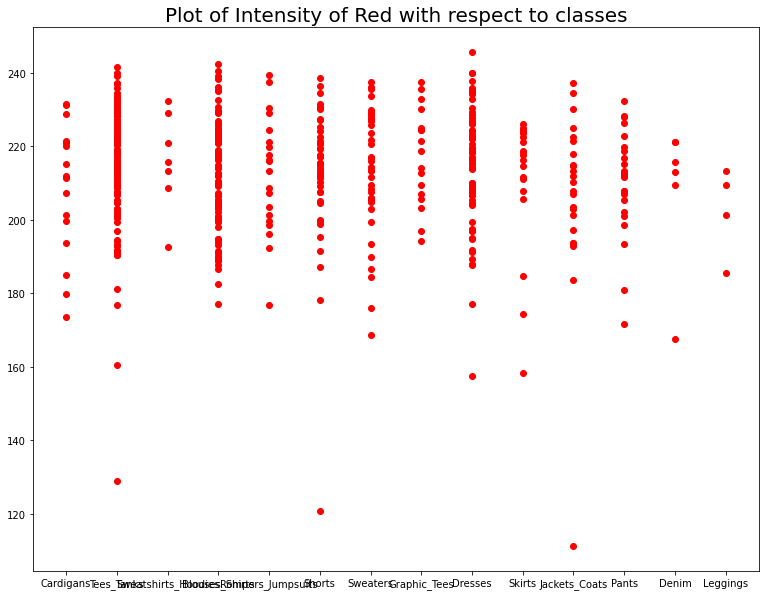

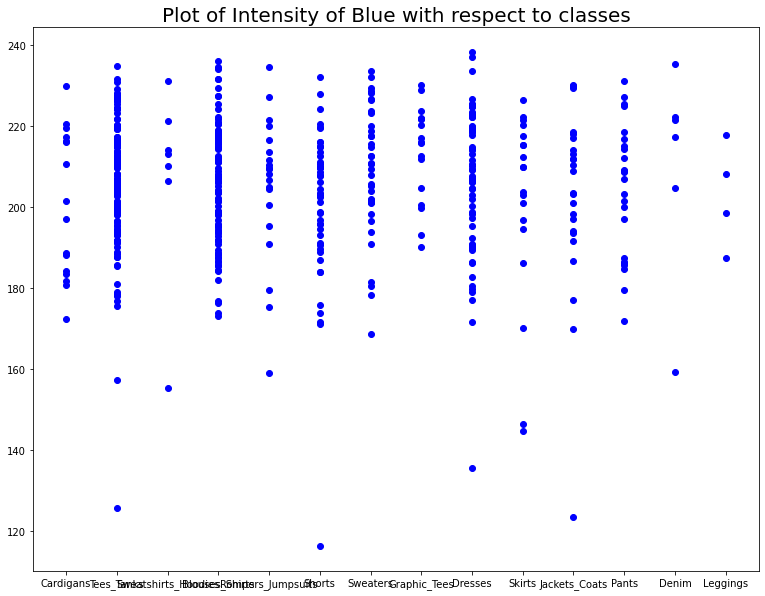

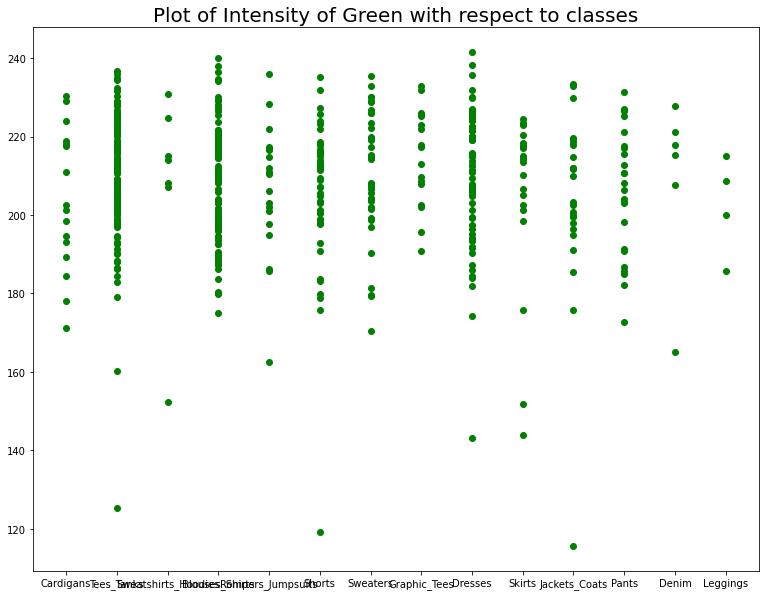

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.scatter(y=df['Red'],x=df['Class'], c='r')
plt.title("Plot of Intensity of Red with respect to classes", fontsize=20)
plt.show()

plt.figure(figsize=(13,10))
plt.scatter(y=df['Blue'],x=df['Class'], c='b')
plt.title("Plot of Intensity of Blue with respect to classes", fontsize=20)
plt.show()

plt.figure(figsize=(13,10))
plt.scatter(y=df['Green'],x=df['Class'], c='g')
plt.title("Plot of Intensity of Green with respect to classes", fontsize=20)
plt.show()

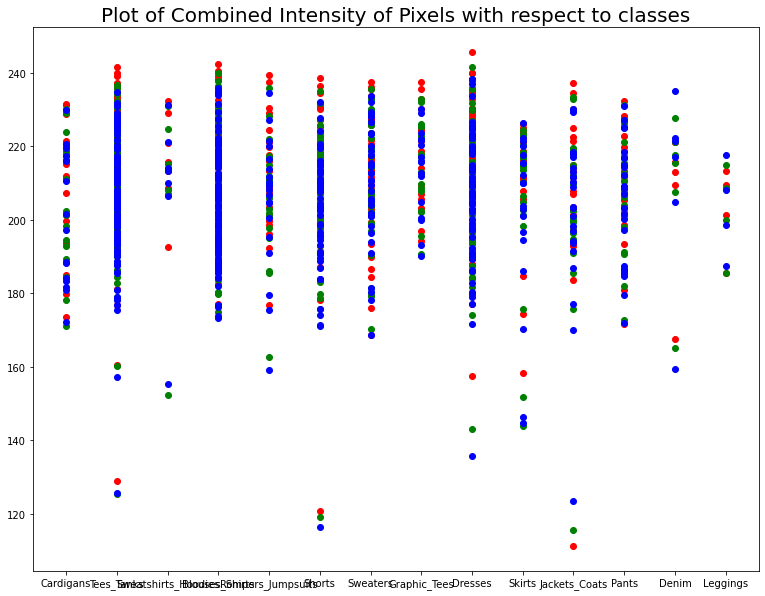

In [ ]:
plt.figure(figsize=(13,10))
plt.scatter(y=df['Red'],x=df['Class'], c='r')
plt.scatter(y=df['Green'],x=df['Class'], c='g')
plt.scatter(y=df['Blue'],x=df['Class'], c='b')
plt.title("Plot of Combined Intensity of Pixels with respect to classes", fontsize=20)
plt.show()

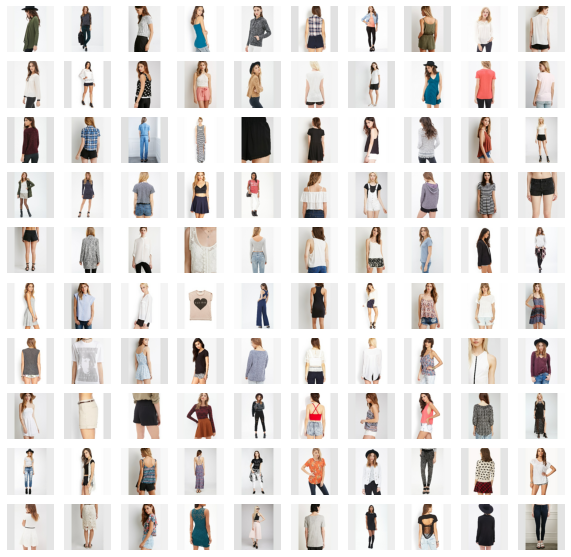

In [ ]:
#Displaying Images in the BatchDataset
plt.figure(figsize=(10, 10))
for i in range(100):
  ax = plt.subplot(10, 10, i + 1)
  plt.imshow(numpy_images[i].astype("uint8"))
  # plt.title(men_data.class_names[labels[i]])
  plt.axis("off")

plt.show()

# ResNET Architecture



*   Read about **ResNET** architecture and advantage of residual blocks
*   Build a simple 6-layer ConvNET and train it on **CIFAR-10** dataset
*   Introduce residual blocks in the above model and compare the results 
*   Use the `tensorflow` library to import ResNET model with imgaenet weights
*   Change some parameters and document the results
*   Visualize the output of some layers and add/delete layers to see the effect of individual layers on the model accuracy



In [ ]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#importing CIFAR-10 dataset
cifar10=keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

##Using a ConvNET model and training on CIFAR-10 dataset

###Building Simple 6-layer ConvNET

In [ ]:
from tensorflow.keras import layers

convnet_model = keras.Sequential([
                                  layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same',
                                  input_shape=(32, 32, 3)),
                                  layers.MaxPool2D(pool_size = (2,2)),
                                  layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
                                  layers.MaxPool2D(pool_size = (2,2)),
                                  layers.Flatten(),
                                  # layers.Dense(512, activation='relu'),
                                  # layers.BatchNormalization(),
                                  layers.Dense(10, activation='sigmoid'),
])

In [ ]:
convnet_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
early_stopping = callbacks.EarlyStopping(
    # min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = convnet_model.fit(
    x=train_images,
    y=train_labels,
    validation_data=(test_images, test_labels),
    batch_size = 32,
    callbacks=[early_stopping],
    epochs=50,
)

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2451 - accuracy: 0.3651 - val_loss: 1.5178 - val_accuracy: 0.4594
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3930 - accuracy: 0.5083 - val_loss: 1.4267 - val_accuracy: 0.5230
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2597 - accuracy: 0.5608 - val_loss: 1.2973 - val_accuracy: 0.5509
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1904 - accuracy: 0.5887 - val_loss: 1.2403 - val_accuracy: 0.5764
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1194 - accuracy: 0.6153 - val_loss: 1.1965 - val_accuracy: 0.5973
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0830 - accuracy: 0.6258 - val_loss: 1.2375 - val_accuracy: 0.5876
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0484 - accuracy: 0.6375 - val_loss: 1.2011 - val_accuracy:

In [ ]:
convnet_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                40970     
Total params: 60,362
Trainable params: 60,362
Non-trainable params: 0
_________________________________________________

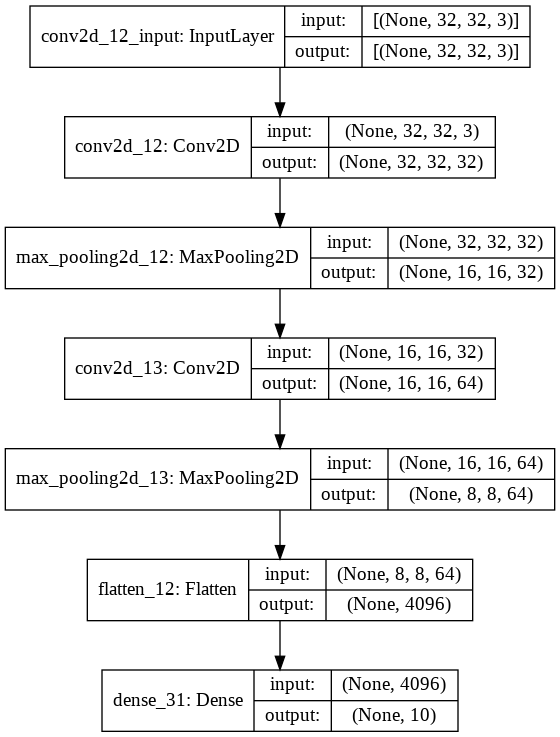

In [ ]:
keras.utils.plot_model(convnet_model, "convet.png", show_shapes=True)

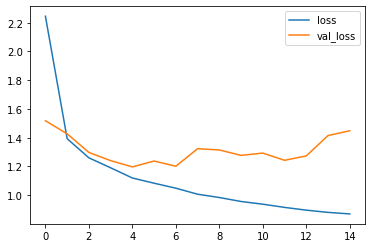

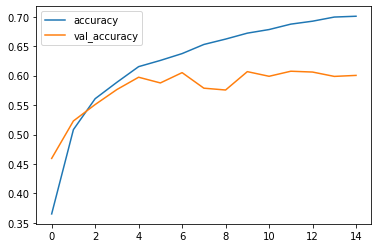

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [ ]:
test_loss, test_acc = resnet_model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 31s 98ms/step - loss: 1.5749 - accuracy: 0.4958
Test accuracy: 0.4957999885082245
Test loss: 1.5749396085739136


###Adding Residual Blocks

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization,Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model

def relu_bn(inputs: Tensor) -> Tensor:
    relu = ReLU()(inputs)
    bn = BatchNormalization()(relu)
    return bn

def residual_block(x: Tensor, downsample: bool, filters: int=32, kernel_size: int = 3) -> Tensor:
    y = Conv2D(kernel_size=kernel_size,
               strides= (1 if not downsample else 2),
               filters=filters,
               padding="same")(x)
    y = relu_bn(y)
    y = Conv2D(kernel_size=kernel_size,
               strides=1,
               filters=filters,
               padding="same")(y)

    if downsample:
        x = Conv2D(kernel_size=1,
                   strides=2,
                   filters=filters,
                   padding="same")(x)
    out = Add()([x, y])
    out = relu_bn(out)
    return out

Using Single Residual Block

In [ ]:
def create_res_net1():
    #Input Layer
    inputs = Input(shape=(32, 32, 3))
    num_filters = 64
    
    #Convolutional Layer 1
    t = Conv2D(kernel_size=3,
               strides=1,
               filters=num_filters,
               padding="same")(inputs)
    t = ReLU()(t)
    t = layers.MaxPooling2D(2)(t)

    #Convolutional Layer 2
    t = Conv2D(kernel_size=3,
               strides=1,
               filters=num_filters,
               padding="same")(t)
    t = relu_bn(t)

    #Residual Block
    t = residual_block(t, downsample=0, filters=num_filters)
    
    t = layers.MaxPooling2D(4)(t)

    #Flatten Layer
    t = Flatten()(t)

    #Output Layer
    outputs = Dense(10, activation='sigmoid')(t)
    
    model = Model(inputs, outputs)

    #Comile the Model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

conv_model = create_res_net1()

In [ ]:
conv_model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_60 (Conv2D)              (None, 32, 32, 64)   1792        input_19[0][0]                   
__________________________________________________________________________________________________
re_lu_44 (ReLU)                 (None, 32, 32, 64)   0           conv2d_60[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_24 (MaxPooling2D) (None, 16, 16, 64)   0           re_lu_44[0][0]                   
___________________________________________________________________________________________

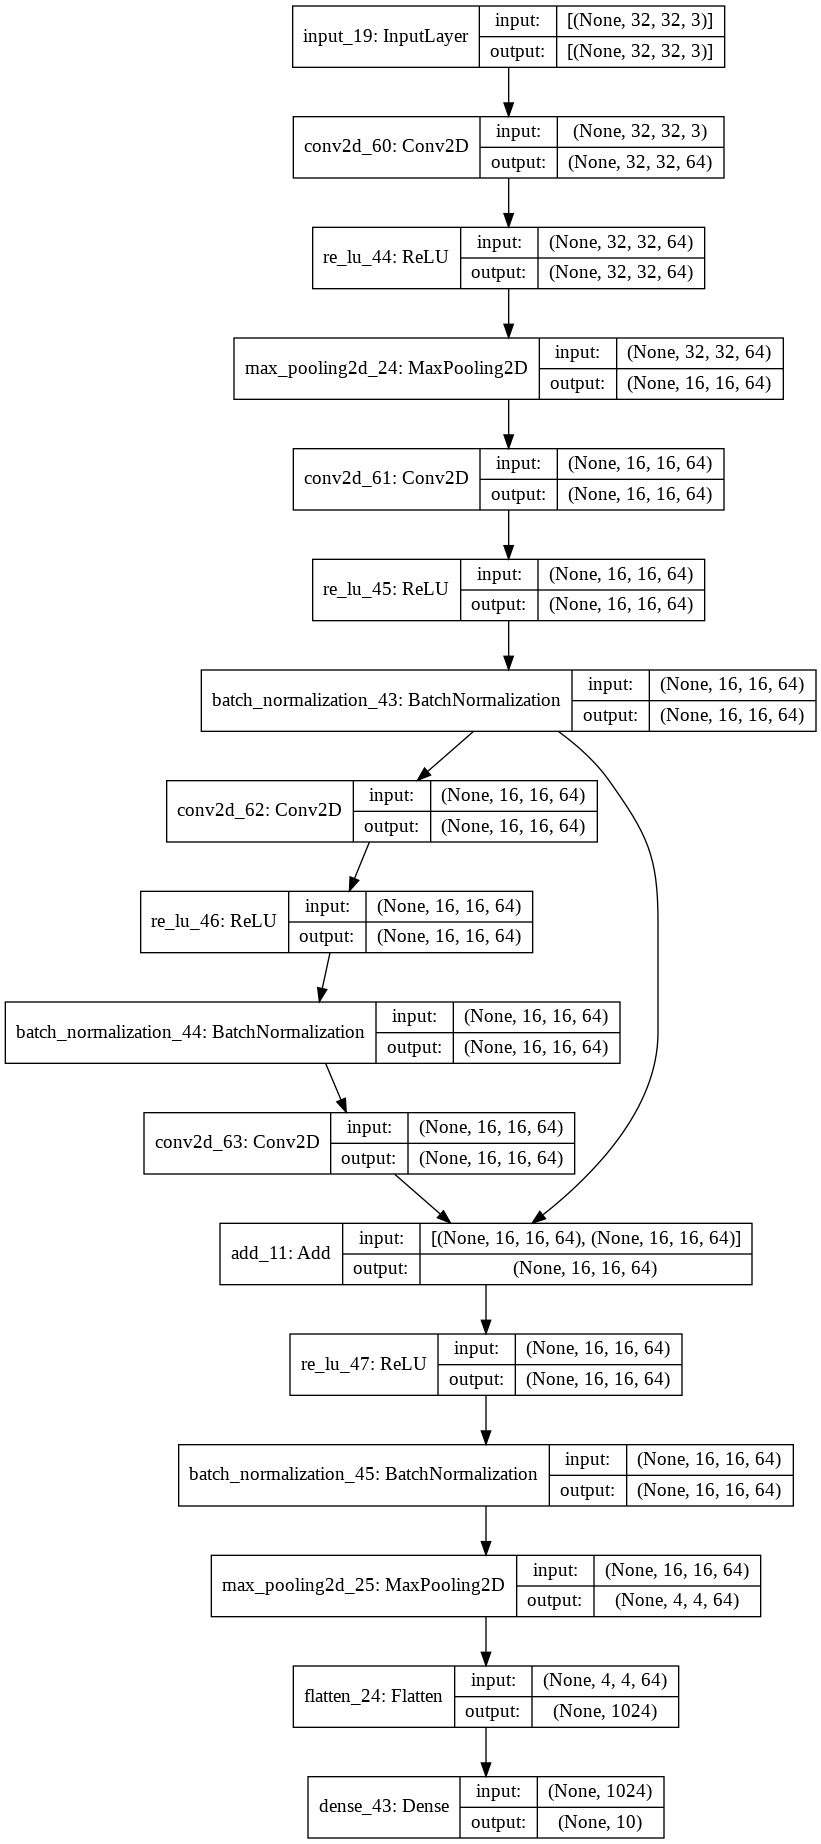

In [ ]:
keras.utils.plot_model(conv_model, "Convnet-with-residual-block.png", show_shapes=True)

In [ ]:
early_stopping = callbacks.EarlyStopping(
    # min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = conv_model.fit(
    x=train_images,
    y=train_labels,
    validation_data=(test_images, test_labels),
    batch_size = 32,
    callbacks=[early_stopping],
    epochs=50,
)

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4229 - accuracy: 0.5103 - val_loss: 1.3637 - val_accuracy: 0.5476
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9993 - accuracy: 0.6519 - val_loss: 0.9672 - val_accuracy: 0.6674
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8473 - accuracy: 0.7063 - val_loss: 0.9036 - val_accuracy: 0.6893
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7480 - accuracy: 0.7411 - val_loss: 1.0435 - val_accuracy: 0.6437
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6784 - accuracy: 0.7650 - val_loss: 1.1473 - val_accuracy: 0.6300
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6187 - accuracy: 0.7840 - val_loss: 0.8584 - val_accuracy: 0.7196
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5680 - accuracy: 0.8027 - val_loss: 0.9281 - val_accuracy:

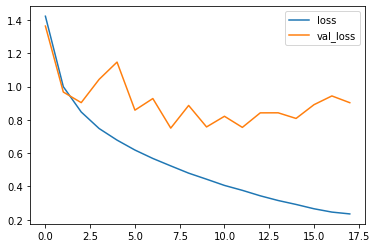

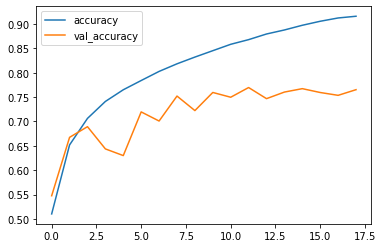

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [ ]:
test_loss, test_acc = conv_model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.7504 - accuracy: 0.7521
Test accuracy: 0.7520999908447266
Test loss: 0.7504462599754333


##Using a Pretrained ResNET model and training on CIFAR-10 dataset

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import layers,callbacks

In [ ]:
resnet_base = ResNet50(
  include_top=True,
  weights='imagenet',
  classifier_activation='softmax',
)

resnet_base.trainable = False

resnet_model = keras.Sequential([
    layers.UpSampling2D(size=(7, 7), input_shape=(32,32,3)),
    resnet_base,
    
    layers.Dense(10, activation='sigmoid'),
])

In [ ]:
resnet_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     metrics=['accuracy']
                     )

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = resnet_model.fit(
    x=train_images,
    y=train_labels,
    validation_data=(test_images, test_labels),
    batch_size = 32,
    callbacks=[early_stopping],
    epochs=5,
)

Epoch 1/5
1563/1563 [==============================] - 180s 114ms/step - loss: 2.1527 - accuracy: 0.4150 - val_loss: 2.0239 - val_accuracy: 0.4586
Epoch 2/5
1563/1563 [==============================] - 188s 120ms/step - loss: 1.9320 - accuracy: 0.4605 - val_loss: 1.8460 - val_accuracy: 0.4704
Epoch 3/5
1563/1563 [==============================] - 176s 113ms/step - loss: 1.7860 - accuracy: 0.4741 - val_loss: 1.7272 - val_accuracy: 0.4764
Epoch 4/5
1563/1563 [==============================] - 176s 112ms/step - loss: 1.6861 - accuracy: 0.4830 - val_loss: 1.6450 - val_accuracy: 0.4861
Epoch 5/5
1563/1563 [==============================] - 175s 112ms/step - loss: 1.6152 - accuracy: 0.4905 - val_loss: 1.5860 - val_accuracy: 0.4957


Result using Single Dense Layer

In [ ]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d_4 (UpSampling2 (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, 1000)              25636712  
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
Total params: 25,646,722
Trainable params: 10,010
Non-trainable params: 25,636,712
_________________________________________________________________


In [ ]:
test_loss, test_acc = resnet_model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 31s 98ms/step - loss: 1.5860 - accuracy: 0.4957
Test accuracy: 0.49570000171661377
Test loss: 1.5860276222229004


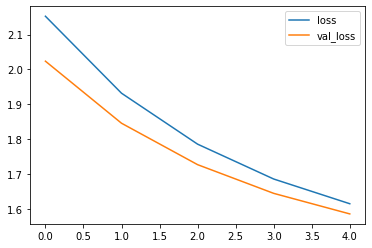

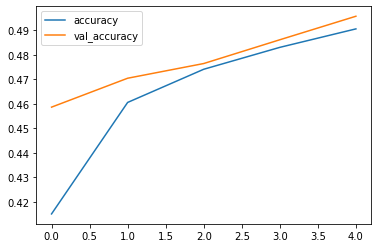

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

Result using 3 dense layers

In [ ]:
test_loss, test_acc = resnet_model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 40s 127ms/step - loss: 1.0760 - accuracy: 0.6259
Test accuracy: 0.6258999705314636
Test loss: 1.075969934463501


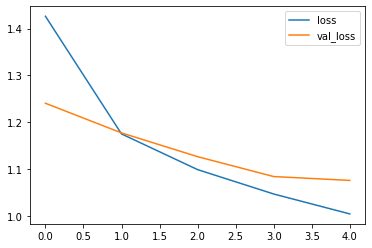

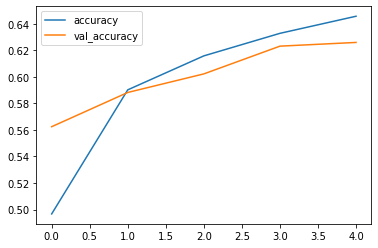

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();